In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("all energy statistics.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Group data to calculate total quantity for each country and energy category
df_grouped = df.groupby(['country_or_area', 'category', 'year'])['quantity'].sum().reset_index()

# Pivot table to organize energy sources in separate columns
df_pivot = df_grouped.pivot_table(index=['country_or_area', 'year'], columns='category', values='quantity', fill_value=0)

# Reset index
df_pivot.reset_index(inplace=True)

# Create calculated columns
df_pivot['Total Energy Production'] = df_pivot.sum(axis=1, numeric_only=True)
df_pivot['Renewable Share'] = (df_pivot.get('Renewables', 0) / df_pivot['Total Energy Production']) * 100

# Display first few rows
print(df_pivot.head())


Missing Values:
 country_or_area                0
commodity_transaction          0
year                           0
unit                           0
quantity                       0
quantity_footnotes       1025536
category                       0
dtype: int64
category country_or_area       year  additives_and_oxygenates  animal_waste  \
0            Afghanistan 1990-01-01                       0.0           0.0   
1            Afghanistan 1991-01-01                       0.0           0.0   
2            Afghanistan 1992-01-01                       0.0           0.0   
3            Afghanistan 1993-01-01                       0.0           0.0   
4            Afghanistan 1994-01-01                       0.0           0.0   

category  anthracite  aviation_gasoline  bagasse  biodiesel  biogases  \
0                0.0               12.0      0.0        0.0       0.0   
1                0.0               12.0      0.0        0.0       0.0   
2                0.0                0.0      

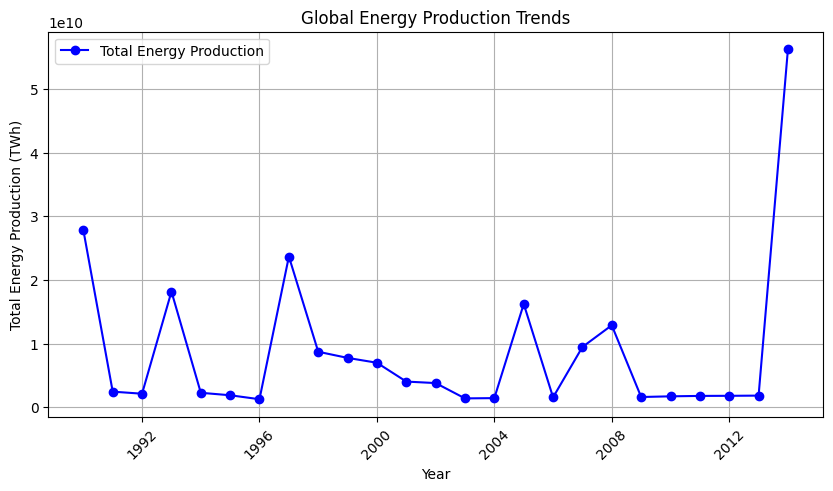

In [2]:
import matplotlib.pyplot as plt

# Ensure 'year' is in datetime format
df_pivot['year'] = pd.to_datetime(df_pivot['year'], format='%Y')

# Aggregate total energy production across all countries
df_global = df_pivot.groupby('year')['Total Energy Production'].sum().reset_index()

# Plot global energy production trends
plt.figure(figsize=(10, 5))
plt.plot(df_global['year'], df_global['Total Energy Production'], label="Total Energy Production", color='blue', marker='o')

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Total Energy Production (TWh)")
plt.title("Global Energy Production Trends")
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.show()


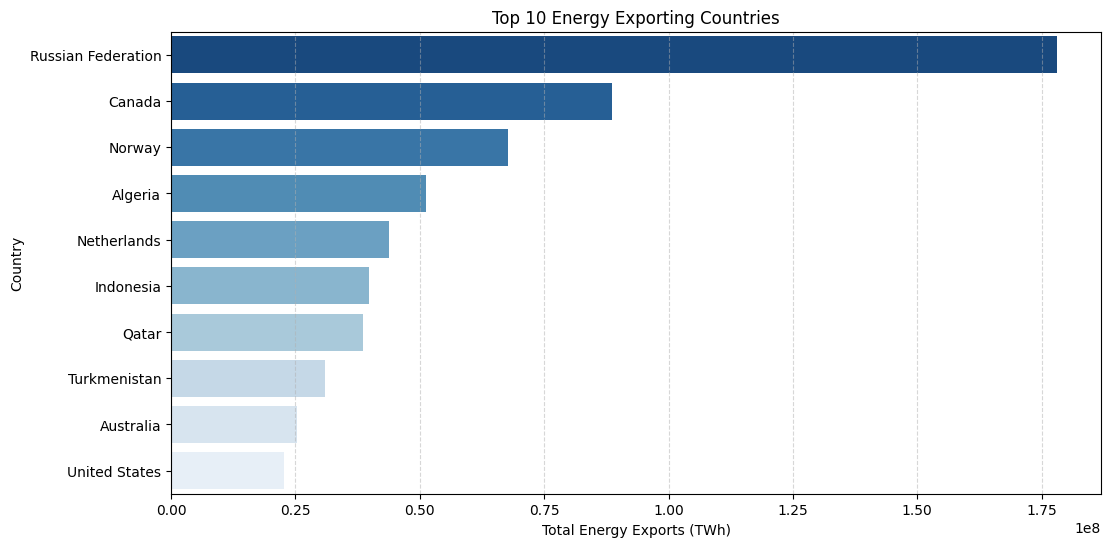

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset for only export transactions
df_exports = df[df['commodity_transaction'].str.contains("Export", case=False, na=False)]

# Group by country and sum exported energy
top_exporters = df_exports.groupby("country_or_area")["quantity"].sum().sort_values(ascending=False).head(10)

# Plot Top 10 Energy Exporters
plt.figure(figsize=(12, 6))
sns.barplot(x=top_exporters.values, y=top_exporters.index, hue=top_exporters.index, palette="Blues_r", legend=False)

# Formatting the chart
plt.xlabel("Total Energy Exports (TWh)")
plt.ylabel("Country")
plt.title("Top 10 Energy Exporting Countries")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'quantity' is numeric (convert if needed)
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

# Drop rows where 'quantity' is NaN
df = df.dropna(subset=['quantity'])

# Filter for Renewable and Non-Renewable energy
renewable_energy = df[df['category'].str.contains("Renewable", case=False, na=False)]['quantity'].sum()
non_renewable_energy = df[df['category'].str.contains("Non-Renewable", case=False, na=False)]['quantity'].sum()

# If both values are zero, print a warning
if renewable_energy == 0 and non_renewable_energy == 0:
    print("Warning: No valid data found for Renewable or Non-Renewable energy categories.")
else:
    # Define labels and sizes
    labels = ['Renewable Energy', 'Non-Renewable Energy']
    sizes = [renewable_energy, non_renewable_energy]
    colors = ['green', 'gray']

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title("Share of Renewable vs. Non-Renewable Energy Production")
    plt.show()


In [7]:
print(df.columns)


Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'quantity_footnotes', 'category'],
      dtype='object')


In [8]:
print(df.head())


  country_or_area               commodity_transaction       year  \
0         Austria  Additives and Oxygenates - Exports 1996-01-01   
1         Austria  Additives and Oxygenates - Exports 1995-01-01   
2         Belgium  Additives and Oxygenates - Exports 2014-01-01   
3         Belgium  Additives and Oxygenates - Exports 2013-01-01   
4         Belgium  Additives and Oxygenates - Exports 2012-01-01   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 0.0   
1  Metric tons,  thousand      17.0                 0.0   
2  Metric tons,  thousand       0.0                 0.0   
3  Metric tons,  thousand       0.0                 0.0   
4  Metric tons,  thousand      35.0                 0.0   

                   category  
0  additives_and_oxygenates  
1  additives_and_oxygenates  
2  additives_and_oxygenates  
3  additives_and_oxygenates  
4  additives_and_oxygenates  


In [9]:
print(df['category'].unique())


['additives_and_oxygenates' 'animal_waste' 'anthracite'
 'aviation_gasoline' 'bagasse' 'biodiesel' 'biogases' 'biogasoline'
 'bitumen' 'black_liquor' 'blast_furnace_gas' 'brown_coal_briquettes'
 'brown_coal' 'charcoal' 'coal_tar' 'coke_oven_coke' 'coking_coal'
 'conventional_crude_oil' 'direct_use_of_geothermal_heat'
 'direct_use_of_solar_thermal_heat'
 'electricity_net_installed_capacity_of_electric_power_plants' 'ethane'
 'falling_water' 'fuel_oil' 'fuelwood' 'gas_coke' 'gas_oil_diesel_oil'
 'gasoline_type_jet_fuel' 'gasworks_gas' 'geothermal' 'hard_coal' 'heat'
 'hydro' 'industrial_waste' 'kerosene_type_jet_fuel' 'lignite'
 'liquified_petroleum_gas' 'lubricants' 'motor_gasoline'
 'municipal_wastes' 'naphtha' 'natural_gas_including_lng'
 'natural_gas_liquids' 'nuclear_electricity' 'of_which_biodiesel'
 'of_which_biogasoline' 'oil_shale_oil_sands' 'other_bituminous_coal'
 'other_coal_products' 'other_hydrocarbons' 'other_kerosene'
 'other_liquid_biofuels' 'other_oil_products_n_e_c'
 '

In [10]:
print(df[df['category'].str.contains("Renewable", case=False, na=False)])
print(df[df['category'].str.contains("Non-Renewable", case=False, na=False)])


Empty DataFrame
Columns: [country_or_area, commodity_transaction, year, unit, quantity, quantity_footnotes, category]
Index: []
Empty DataFrame
Columns: [country_or_area, commodity_transaction, year, unit, quantity, quantity_footnotes, category]
Index: []


In [11]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Print category values for debugging
print("Unique categories:", df['category'].unique())

# Adjust filtering (in case the dataset has subcategories)
renewable_keywords = ["renewable", "solar", "wind", "hydro"]
non_renewable_keywords = ["non-renewable", "coal", "oil", "gas"]

renewable_energy = df[df['category'].str.contains('|'.join(renewable_keywords), case=False, na=False)]['quantity'].sum()
non_renewable_energy = df[df['category'].str.contains('|'.join(non_renewable_keywords), case=False, na=False)]['quantity'].sum()

print(f"Renewable Energy Sum: {renewable_energy}")
print(f"Non-Renewable Energy Sum: {non_renewable_energy}")


Unique categories: ['additives_and_oxygenates' 'animal_waste' 'anthracite'
 'aviation_gasoline' 'bagasse' 'biodiesel' 'biogases' 'biogasoline'
 'bitumen' 'black_liquor' 'blast_furnace_gas' 'brown_coal_briquettes'
 'brown_coal' 'charcoal' 'coal_tar' 'coke_oven_coke' 'coking_coal'
 'conventional_crude_oil' 'direct_use_of_geothermal_heat'
 'direct_use_of_solar_thermal_heat'
 'electricity_net_installed_capacity_of_electric_power_plants' 'ethane'
 'falling_water' 'fuel_oil' 'fuelwood' 'gas_coke' 'gas_oil_diesel_oil'
 'gasoline_type_jet_fuel' 'gasworks_gas' 'geothermal' 'hard_coal' 'heat'
 'hydro' 'industrial_waste' 'kerosene_type_jet_fuel' 'lignite'
 'liquified_petroleum_gas' 'lubricants' 'motor_gasoline'
 'municipal_wastes' 'naphtha' 'natural_gas_including_lng'
 'natural_gas_liquids' 'nuclear_electricity' 'of_which_biodiesel'
 'of_which_biogasoline' 'oil_shale_oil_sands' 'other_bituminous_coal'
 'other_coal_products' 'other_hydrocarbons' 'other_kerosene'
 'other_liquid_biofuels' 'other_oil

['Additives and Oxygenates - Exports' 'Additives and Oxygenates - Imports'
 'Additives and Oxygenates - Production' ...
 'White spirit and special boiling point industrial spirits - Transformation'
 'White spirit and special boiling point industrial spirits - Transformation in petrochemical plants'
 'Electricity - total wind production']


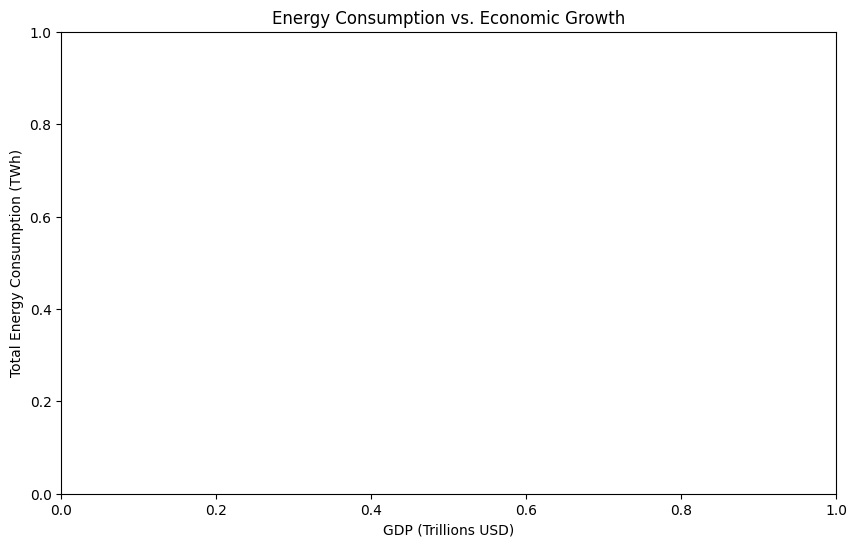

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no leading/trailing spaces in column names
df.columns = df.columns.str.strip().str.lower()

# Check unique values in 'commodity_transaction'
print(df['commodity_transaction'].unique())

# Filter relevant data
gdp_data = df[df['commodity_transaction'].str.contains("GDP", case=False, na=False)]
energy_data = df[df['commodity_transaction'].str.contains("Energy Consumption", case=False, na=False)]

# Merge GDP and Energy Consumption Data
df_merged = pd.merge(
    gdp_data[['country_or_area', 'year', 'quantity']],
    energy_data[['country_or_area', 'year', 'quantity']],
    on=['country_or_area', 'year'],
    suffixes=('_gdp', '_energy')
)

# Rename columns
df_merged.rename(columns={'quantity_gdp': 'GDP', 'quantity_energy': 'Total Energy Consumption'}, inplace=True)

# Convert values to numeric (if needed)
df_merged['GDP'] = pd.to_numeric(df_merged['GDP'], errors='coerce')
df_merged['Total Energy Consumption'] = pd.to_numeric(df_merged['Total Energy Consumption'], errors='coerce')

# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_merged["GDP"], y=df_merged["Total Energy Consumption"], hue=df_merged["country_or_area"])
plt.xlabel("GDP (Trillions USD)")
plt.ylabel("Total Energy Consumption (TWh)")
plt.title("Energy Consumption vs. Economic Growth")
plt.show()


In [14]:
print(df['commodity_transaction'].unique())


['Additives and Oxygenates - Exports' 'Additives and Oxygenates - Imports'
 'Additives and Oxygenates - Production' ...
 'White spirit and special boiling point industrial spirits - Transformation'
 'White spirit and special boiling point industrial spirits - Transformation in petrochemical plants'
 'Electricity - total wind production']


In [15]:
df.to_csv("Cleaned All Energy Statistics.csv", index=False)
